<a href="https://colab.research.google.com/github/ellaclauz/Meal_Temperature-Data/blob/main/clean_meal_temp_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

         Working with data from Poll 1

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 25June2022_Poll1.csv to 25June2022_Poll1.csv


In [4]:
Temp_data = pd.read_csv("25June2022_Poll1.csv")
Temp_data

,Timestamp,Username,Name,"In your area, right now, what is the temperature?",Did you provide that temperature in degrees Fahrenhait (F) or in degrees Celsius (C)?
0,2022/06/25 11:56:51 AM MDT,oluwaseyi.bola@gmail.com,Oluwaseyi Olukemi,28,C
1,2022/06/25 11:57:11 AM MDT,lizzyajai@gmail.com,Ajayi Elizabeth Damilola,29,C
2,2022/06/25 11:58:02 AM MDT,maryannmwangi36@gmail.com,Maryann Mwangi,19,C
3,2022/06/25 11:58:47 AM MDT,tjshotunde@yahoo.com,Oreoluwa Jimi-Shotunde,28,C
4,2022/06/25 12:00:01 PM MDT,winfredplt583@gmail.com,Winfred Apolot,20,C
...,...,...,...,...,...
61,2022/06/25 12:59:28 PM MDT,cynthiakuzira@gmail.com,Kuzira Cynthia,37,C
62,2022/06/25 12:59:29 PM MDT,berylakinyi150@gmail.com,Ochieng Beril Akinyi,19,C
63,2022/06/25 12:59:58 PM MDT,kamisandra22@gmail.com,Sandra Kamikazi,22,C
64,2022/06/25 1:11:47 PM MDT,rungibarbra@gmail.com,Barbra Birungi,22,C


In [5]:
Temp_data.columns

Index(['Timestamp', 'Username', 'Name',
       'In your area, right now, what is the temperature?',
       'Did you provide that temperature in degrees Fahrenhait (F) or in degrees Celsius (C)?'],
      dtype='object')

In [6]:
# rename column 
Temp_data = Temp_data.rename(columns= {"Username":"Email", "In your area, right now, what is the temperature?":"Temperature", "Did you provide that temperature in degrees Fahrenhait (F) or in degrees Celsius (C)?":"Metrics" })

In [7]:
Temp_data

,Timestamp,Email,Name,Temperature,Metrics
0,2022/06/25 11:56:51 AM MDT,oluwaseyi.bola@gmail.com,Oluwaseyi Olukemi,28,C
1,2022/06/25 11:57:11 AM MDT,lizzyajai@gmail.com,Ajayi Elizabeth Damilola,29,C
2,2022/06/25 11:58:02 AM MDT,maryannmwangi36@gmail.com,Maryann Mwangi,19,C
3,2022/06/25 11:58:47 AM MDT,tjshotunde@yahoo.com,Oreoluwa Jimi-Shotunde,28,C
4,2022/06/25 12:00:01 PM MDT,winfredplt583@gmail.com,Winfred Apolot,20,C
...,...,...,...,...,...
61,2022/06/25 12:59:28 PM MDT,cynthiakuzira@gmail.com,Kuzira Cynthia,37,C
62,2022/06/25 12:59:29 PM MDT,berylakinyi150@gmail.com,Ochieng Beril Akinyi,19,C
63,2022/06/25 12:59:58 PM MDT,kamisandra22@gmail.com,Sandra Kamikazi,22,C
64,2022/06/25 1:11:47 PM MDT,rungibarbra@gmail.com,Barbra Birungi,22,C


In [8]:
# Taking a look at the distinct value in the temperature column
Temp_data["Temperature"].unique()

array(['28', '29', '19', '28 ', '20', '30', '18', '27', '36',
       '28 Celsius', '17', '71', '22 ', '26', '38', '24', '45', '16',
       '21 Degrees ', '21', '25', '35', '70', '40', '37.5', '65', '37',
       '19 ', '22'], dtype=object)

In [9]:
def clean_temp(temp_val):
    if "Degrees" in temp_val:
        return temp_val.replace("Degrees", "").strip()
    elif "Celsius" in temp_val:
        return temp_val.replace("Celsius", "").strip()
    elif "Fahrenheit" in temp_val:
        return temp_val.replace("Fahrenheit", "").strip()
    else:
        return temp_val

In [10]:
Temp_data["Temperature"] = Temp_data["Temperature"].apply(clean_temp)
Temp_data["Temperature"]

0      28
1      29
2      19
3     28 
4      20
     ... 
61     37
62    19 
63     22
64     22
65     27
Name: Temperature, Length: 66, dtype: object

In [11]:
Temp_data["Temperature"].unique()

array(['28', '29', '19', '28 ', '20', '30', '18', '27', '36', '17', '71',
       '22 ', '26', '38', '24', '45', '16', '21', '25', '35', '70', '40',
       '37.5', '65', '37', '19 ', '22'], dtype=object)

In [12]:
Temp_data.shape

(66, 5)

In [13]:
Temp_data.shape[1]

5

In [14]:
Temp_data["Metrics"].value_counts()

C    61
F     5
Name: Metrics, dtype: int64

In [15]:
Temp_data.dtypes

Timestamp      object
Email          object
Name           object
Temperature    object
Metrics        object
dtype: object

In [16]:
type(Temp_data["Temperature"].iloc[0])

str

In [17]:
Temp_data["Temperature"] = pd.to_numeric(Temp_data["Temperature"])

In [18]:
Temp_data.dtypes

Timestamp       object
Email           object
Name            object
Temperature    float64
Metrics         object
dtype: object

In [19]:
Temp_in_f = np.array([])

In [20]:
Temp_in_f

array([], dtype=float64)

In [21]:
# for each row in the dataframe,
# if metric is C, convert temperature to F and add converted value to numpy array
# else add original temperature value to numpy array
for i in range(0, 66):
    # vist each row 
    # if metric C --> conert to F 
    row = Temp_data.iloc[i] 
    if row["Metrics"] == "C":
        Temp_in_f = np.append(Temp_in_f, (row["Temperature"] * 
        (9/5)) + 32)
    else:
        Temp_in_f = np.append(Temp_in_f, row["Temperature"])

In [22]:
Temp_in_f

array([ 82.4,  84.2,  66.2,  82.4,  68. ,  86. ,  64.4,  66.2,  66.2,
        68. ,  80.6,  68. ,  96.8,  82.4,  64.4,  62.6,  64.4,  64.4,
        82.4,  71. ,  71.6,  78.8,  82.4, 100.4,  64.4,  75.2,  86. ,
        82.4,  78.8,  75.2, 113. ,  82.4,  82.4,  60.8,  78.8,  80.6,
        69.8,  62.6,  69.8,  78.8,  25. ,  84.2,  20. ,  80.6,  86. ,
        95. ,  64.4,  80.6,  80.6,  84.2,  82.4,  70. ,  78.8, 104. ,
        68. ,  84.2,  99.5,  84.2,  65. ,  80.6,  80.6,  98.6,  66.2,
        71.6,  71.6,  80.6])

In [23]:
len(Temp_in_f)

66

In [24]:
# if you want 68. to show up as 68.0 
# call the built-in round function in python
# and use list comprehension
[round(val, 1) for val in Temp_in_f]

[82.4,
 84.2,
 66.2,
 82.4,
 68.0,
 86.0,
 64.4,
 66.2,
 66.2,
 68.0,
 80.6,
 68.0,
 96.8,
 82.4,
 64.4,
 62.6,
 64.4,
 64.4,
 82.4,
 71.0,
 71.6,
 78.8,
 82.4,
 100.4,
 64.4,
 75.2,
 86.0,
 82.4,
 78.8,
 75.2,
 113.0,
 82.4,
 82.4,
 60.8,
 78.8,
 80.6,
 69.8,
 62.6,
 69.8,
 78.8,
 25.0,
 84.2,
 20.0,
 80.6,
 86.0,
 95.0,
 64.4,
 80.6,
 80.6,
 84.2,
 82.4,
 70.0,
 78.8,
 104.0,
 68.0,
 84.2,
 99.5,
 84.2,
 65.0,
 80.6,
 80.6,
 98.6,
 66.2,
 71.6,
 71.6,
 80.6]

In [25]:
Temp_in_f.mean()

76.2378787878788

In [26]:
Temp_data["Temperature"] = Temp_in_f

In [27]:
Temp_data

,Timestamp,Email,Name,Temperature,Metrics
0,2022/06/25 11:56:51 AM MDT,oluwaseyi.bola@gmail.com,Oluwaseyi Olukemi,82.4,C
1,2022/06/25 11:57:11 AM MDT,lizzyajai@gmail.com,Ajayi Elizabeth Damilola,84.2,C
2,2022/06/25 11:58:02 AM MDT,maryannmwangi36@gmail.com,Maryann Mwangi,66.2,C
3,2022/06/25 11:58:47 AM MDT,tjshotunde@yahoo.com,Oreoluwa Jimi-Shotunde,82.4,C
4,2022/06/25 12:00:01 PM MDT,winfredplt583@gmail.com,Winfred Apolot,68.0,C
...,...,...,...,...,...
61,2022/06/25 12:59:28 PM MDT,cynthiakuzira@gmail.com,Kuzira Cynthia,98.6,C
62,2022/06/25 12:59:29 PM MDT,berylakinyi150@gmail.com,Ochieng Beril Akinyi,66.2,C
63,2022/06/25 12:59:58 PM MDT,kamisandra22@gmail.com,Sandra Kamikazi,71.6,C
64,2022/06/25 1:11:47 PM MDT,rungibarbra@gmail.com,Barbra Birungi,71.6,C


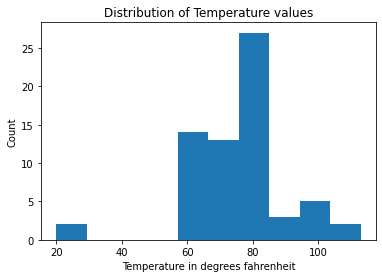

In [28]:
# create a histogram to visualize the distribution of temperature values in F
plt.hist(Temp_data["Temperature"])
plt.title("Distribution of Temperature values")
plt.xlabel("Temperature in degrees fahrenheit")
plt.ylabel("Count")
plt.show()

Simple Random Sampling

In [29]:
Temp_data.sample(n=20, random_state=0)

,Timestamp,Email,Name,Temperature,Metrics
45,2022/06/25 12:37:12 PM MDT,nwaodorifechukwude@gmail.com,Nwaodor ifechukwude destiny,95.0,C
28,2022/06/25 12:12:27 PM MDT,samanthaerskine1@gmail.com,Samantha Erskine,78.8,C
29,2022/06/25 12:12:56 PM MDT,roseheromini@gmail.com,Rozi Hieromini Mlay,75.2,C
55,2022/06/25 12:49:41 PM MDT,r.adeagbo@gmail.com,Roselyn Adeagbo,84.2,C
63,2022/06/25 12:59:58 PM MDT,kamisandra22@gmail.com,Sandra Kamikazi,71.6,C
31,2022/06/25 12:14:39 PM MDT,sobowalemoyinoluwa@gmail.com,Moyinoluwa Sobowale,82.4,C
51,2022/06/25 12:41:04 PM MDT,janice.gbedemah@gmail.com,Janice Afi Gbedemah,70.0,F
46,2022/06/25 12:37:30 PM MDT,yvonneakinyi1997@gmail.com,Yvonne Akinyi Okello,64.4,C
34,2022/06/25 12:19:03 PM MDT,ednadzottsi@gmail.com,EDNA SEYRAM DZOTTSI,78.8,C
4,2022/06/25 12:00:01 PM MDT,winfredplt583@gmail.com,Winfred Apolot,68.0,C


       Working with data from Poll 2

In [30]:
from google.colab import files
uploaded = files.upload()

Saving 25June2022_Poll2.xlsx to 25June2022_Poll2.xlsx


In [31]:
Meal_data = pd.read_excel("25June2022_Poll2.xlsx")
Meal_data

,What is your favorite meal of the day typically?,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,https://strawpoll.com/polls/X3nk6NdxVyE,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Answer Options,Votes,Percent,NaN
3,Breakfast,30,48.39%,NaN
4,Lunch,22,35.48%,NaN
...,...,...,...,...
67,Jane Ndambuki,0,0,1
68,Modupeoluwa Adedeji,1,0,0
69,Yvanie KAMIKAZI,1,0,0
70,Tolulope Adeneye,0,0,1


In [32]:
Meal_data.head(10)

,What is your favorite meal of the day typically?,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,https://strawpoll.com/polls/X3nk6NdxVyE,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Answer Options,Votes,Percent,NaN
3,Breakfast,30,48.39%,NaN
4,Lunch,22,35.48%,NaN
5,Dinner,10,16.13%,NaN
6,Total Votes,62,100%,NaN
7,NaN,NaN,NaN,NaN
8,Name,Breakfast,Lunch,Dinner
9,Oluwaseyi Olukemi,0,1,0


In [33]:
Meal_data.iloc[8].values

array(['Name', 'Breakfast', 'Lunch', 'Dinner'], dtype=object)

In [34]:
Meal_data.tail(10)

,What is your favorite meal of the day typically?,Unnamed: 1,Unnamed: 2,Unnamed: 3
62,Esther Ugochukwu Amaka Okolie,0,1,0
63,Gertrude Abarinde,0,1,0
64,Roselyn Adeagbo,1,0,0
65,Victoria Bamikole,1,0,0
66,Fiona Masagbor,1,0,0
67,Jane Ndambuki,0,0,1
68,Modupeoluwa Adedeji,1,0,0
69,Yvanie KAMIKAZI,1,0,0
70,Tolulope Adeneye,0,0,1
71,Total ✓ Votes,30,22,10


In [35]:
# let's start cleaning
# select just all the rows corresponding to individual respondents, 
# and put the resulting dataframe into a new variable
Meal_data_cleaned = Meal_data.iloc[9:71]

In [36]:
Meal_data_cleaned

,What is your favorite meal of the day typically?,Unnamed: 1,Unnamed: 2,Unnamed: 3
9,Oluwaseyi Olukemi,0,1,0
10,Ajayi Elizabeth Damilola,0,1,0
11,Maryann Mwangi,1,0,0
12,Oreoluwa Jimi-Shotunde,1,0,0
13,Winfred Apolot,0,1,0
...,...,...,...,...
66,Fiona Masagbor,1,0,0
67,Jane Ndambuki,0,0,1
68,Modupeoluwa Adedeji,1,0,0
69,Yvanie KAMIKAZI,1,0,0


In [37]:
# rename the columns
Meal_data_cleaned = Meal_data_cleaned.rename(columns={"What is your favorite meal of the day typically?":"Name",
                                                     "Unnamed: 1":"Breakfast",
                                                     "Unnamed: 2":"Lunch",
                                                     "Unnamed: 3":"Dinner"})


In [38]:
Meal_data_cleaned

,Name,Breakfast,Lunch,Dinner
9,Oluwaseyi Olukemi,0,1,0
10,Ajayi Elizabeth Damilola,0,1,0
11,Maryann Mwangi,1,0,0
12,Oreoluwa Jimi-Shotunde,1,0,0
13,Winfred Apolot,0,1,0
...,...,...,...,...
66,Fiona Masagbor,1,0,0
67,Jane Ndambuki,0,0,1
68,Modupeoluwa Adedeji,1,0,0
69,Yvanie KAMIKAZI,1,0,0


In [39]:
# reset the row indices of the cleaned dataframe and drop the existing row indices
Meal_data_cleaned = Meal_data_cleaned.reset_index(drop=True)
Meal_data_cleaned

,Name,Breakfast,Lunch,Dinner
0,Oluwaseyi Olukemi,0,1,0
1,Ajayi Elizabeth Damilola,0,1,0
2,Maryann Mwangi,1,0,0
3,Oreoluwa Jimi-Shotunde,1,0,0
4,Winfred Apolot,0,1,0
...,...,...,...,...
57,Fiona Masagbor,1,0,0
58,Jane Ndambuki,0,0,1
59,Modupeoluwa Adedeji,1,0,0
60,Yvanie KAMIKAZI,1,0,0


In [40]:
# create an empty list that we can use to store the preferred meal for each respondent
Meal = []

In [41]:
Meal

[]

In [42]:
# for each row in the cleaned dataframe,
# if the value in the Breakfast column is 1, add "Breakfast" to the meal list,
# elif the value in the Lunch column is 1, add "Lunch" to the meal list,
# else add "Dinner" to the meal list
for i in range(0, 62):
    row = Meal_data_cleaned.iloc[i]
    if row["Breakfast"] == 1:
        Meal.append("Breakfast")
    elif row["Lunch"] == 1:
        Meal.append("Lunch")
    else:
        Meal.append("Dinner")

In [43]:
# take a look at the meal list now
Meal

['Lunch',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Dinner',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Breakfast',
 'Dinner',
 'Breakfast',
 'Dinner',
 'Breakfast',
 'Dinner',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Dinner',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Breakfast',
 'Dinner',
 'Lunch',
 'Lunch',
 'Breakfast',
 'Lunch',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Dinner',
 'Lunch',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Dinner',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Dinner',
 'Breakfast',
 'Breakfast',
 'Dinner']

In [44]:
len(Meal)

62

In [45]:
Meal_data_cleaned["Meal"] = Meal

In [46]:
Meal_data_cleaned

,Name,Breakfast,Lunch,Dinner,Meal
0,Oluwaseyi Olukemi,0,1,0,Lunch
1,Ajayi Elizabeth Damilola,0,1,0,Lunch
2,Maryann Mwangi,1,0,0,Breakfast
3,Oreoluwa Jimi-Shotunde,1,0,0,Breakfast
4,Winfred Apolot,0,1,0,Lunch
...,...,...,...,...,...
57,Fiona Masagbor,1,0,0,Breakfast
58,Jane Ndambuki,0,0,1,Dinner
59,Modupeoluwa Adedeji,1,0,0,Breakfast
60,Yvanie KAMIKAZI,1,0,0,Breakfast


In [47]:
Meal_data_cleaned["Meal"].value_counts()

Breakfast    30
Lunch        22
Dinner       10
Name: Meal, dtype: int64

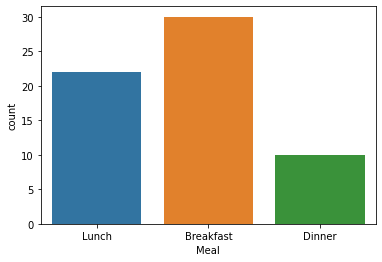

In [48]:
# create a countplot to visualize the breakdown of number of votes per meal
sn.countplot(x = "Meal", data = Meal_data_cleaned)
plt.show()

    Merging the Temperature data (post cleaning) with the Meal data (post cleaning)

In [49]:
# merge the two specified dataframes, and store the resulting dataframe in a new variable
Temp_meal_data = pd.merge(Temp_data, Meal_data_cleaned, how="inner", on="Name")

In [ ]:
Temp_meal_data

,Timestamp,Email,Name,Temperature,Metrics,Breakfast,Lunch,Dinner,Meal
0,2022/06/25 11:58:47 AM MDT,tjshotunde@yahoo.com,Oreoluwa Jimi-Shotunde,82.4,C,1,0,0,Breakfast
1,2022/06/25 12:00:01 PM MDT,winfredplt583@gmail.com,Winfred Apolot,68.0,C,0,1,0,Lunch
2,2022/06/25 12:02:14 PM MDT,missonyango.so@gmail.com,Shereen Onyango,64.4,C,0,0,1,Dinner
3,2022/06/25 12:02:25 PM MDT,njerimacharia07@gmail.com,Njeri Macharia,66.2,C,1,0,0,Breakfast
4,2022/06/25 12:02:47 PM MDT,rachealsibindi@gmail.com,Racheal Sibindi,66.2,C,0,1,0,Lunch
5,2022/06/25 12:02:53 PM MDT,halimatshaddiya@gmail.com,Halimat Raji,68.0,C,1,0,0,Breakfast
6,2022/06/25 12:03:23 PM MDT,oluwatobiibironkeoluwa@gmail.com,Oluwatobi Oluwa,80.6,C,0,0,1,Dinner
7,2022/06/25 12:03:40 PM MDT,annakarungi15@gmail.com,Karungi Anna,68.0,C,1,0,0,Breakfast
8,2022/06/25 12:04:43 PM MDT,Fatimaisokrari@gmail.com,Fatima Isokrari,82.4,C,0,0,1,Dinner
9,2022/06/25 12:04:44 PM MDT,wacheramaina@gmail.com,Mary Wacera Maina,64.4,C,1,0,0,Breakfast


In [50]:
# number of rows in merged
Temp_meal_data.shape[0]
# this number also represents how many respondents in the two polls matched in terms of name. 
# this number is small because some people did not respond to both polls (only responded to one of them)
# and some people did not enter their name consistently between the two polls

31

In [51]:
Temp_meal_data.shape[1]

9

In [52]:
# group by meal and get the average temperature in F
Temp_meal_data.groupby(by = "Meal")["Temperature"].mean()

Meal
Breakfast    71.580000
Dinner       79.485714
Lunch        77.800000
Name: Temperature, dtype: float64

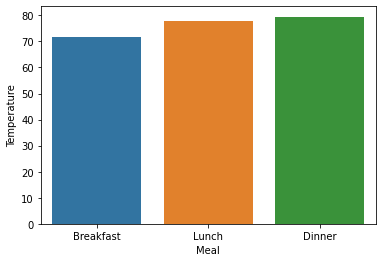

In [53]:
# create a barplot to visualize the average local temperature in F of respondents grouped by preferred meal
sn.barplot(x = "Meal", y = "Temperature", data = Temp_meal_data, ci = False)
plt.show()

In [54]:
Temp_meal_data.to_csv("Temp_meal_data.csv")